# Reading and Plotting Images

Julia provides a large set of image processing functions in the `Images` package. However, here we will focus on the mathematics and the algorithm behind some of these functions, and work directly on the arrays.

We will use `PyPlot` to read and plot images, as shown below:

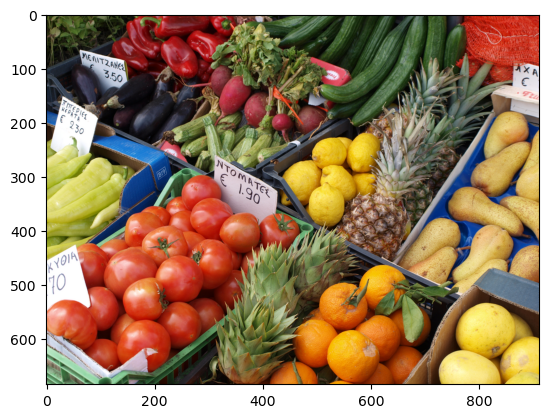

In [1]:
using PyPlot
A = imread("sample_photo.png")
imshow(A);

Using standard Julia functions, we can determine that the image is represented in a 3-dimensional array of `Float32`, with values between 0 and 1:

In [2]:
println("A is of type $(typeof(A)) with dimensions $(size(A))")
println("The values of A range between $(minimum(A)) and $(maximum(A))")

A is of type Array{Float32, 3} with dimensions (684, 912, 3)
The values of A range between 0.0 and 1.0


Here, the first 2 dimensions are row and the column indices of the pixels in the image, and the 3rd dimension of length 3 correspond to the RGB (Red-Green-Blue) components of the corresponding color.

It is convenient to work with `Float` numbers, however, images are normally stored as `UInt8` with only 256 integer values for each RGB components. This is also supported by PyPlot, but for simplicity we will use the `Float32` format here.

## RGB values, Grayscale images

To illustrate how the RGB components build up the color of each pixel, we can build and plot new images which only contain each of the components:

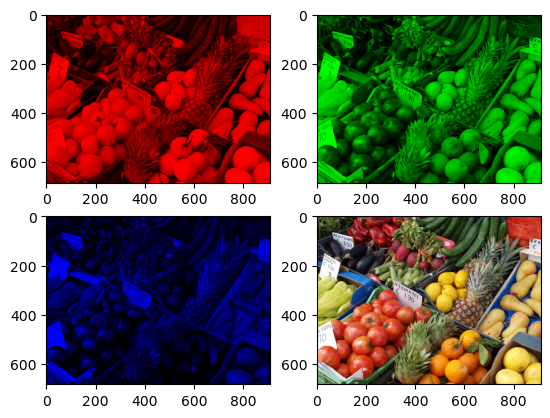

In [3]:
Ar = copy(A); Ar[:,:,[2,3]] .= 0.0;
Ag = copy(A); Ag[:,:,[1,3]] .= 0.0;
Ab = copy(A); Ab[:,:,[1,2]] .= 0.0;
subplot(2,2,1); imshow(Ar);
subplot(2,2,2); imshow(Ag);
subplot(2,2,3); imshow(Ab);
subplot(2,2,4); imshow(A);

The image algorithms we will cover here are easiest understood by considering a single component instead of the full RGB color (such as the *intensity* or the *brightness* of each pixel). Here we simply find the average of each color component, and treat the resulting array as a grayscale image:

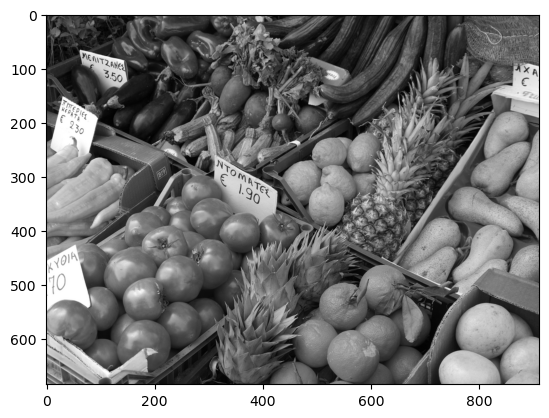

In [4]:
using Statistics
B = mean(A, dims=3)[:,:,1]

function imshow_scale(A)
    # Like imshow(A) but scales the values to [0,1] and supports grayscale
    
    A .-= minimum(A)            # Scale and shift to [0,1]
    A ./= maximum(A)
    if ndims(A) < 3
        A = reshape(A, size(A,1), size(A,2), 1)
    end
    if size(A,3) == 1
        A = repeat(A, 1, 1, 3)  # Set R=G=B for grayscale
    end
    imshow(A)
end

imshow_scale(B);

We will also sometimes consider *binary images*, which only contains two colors for example black and white. One way to generate these is by applying a threshold on an image. Below we also show how to *invert* an image, by applying the transformation $1-x$ to each gray value $x$.

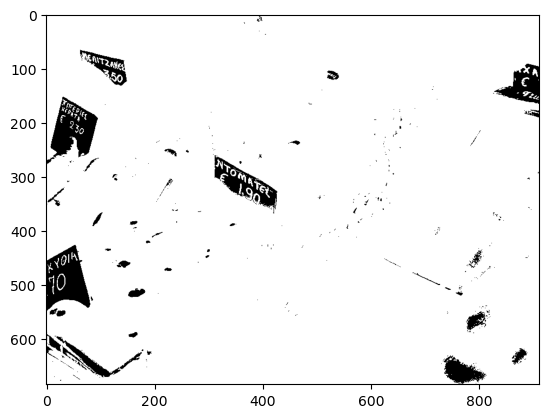

In [5]:
function image_threshold(A, th)
    return Float64.(A .> th)
end

imshow_scale(1.0 .- image_threshold(B, 0.8));